# UPGRADE - A machine learning approach for the classification of cardiac arrhythmia
The aim of second part of this project is to improve and creatively expand the results we obtained after the individual work.

##### Ana Terović, Igor Aradski, Eleonora Detić

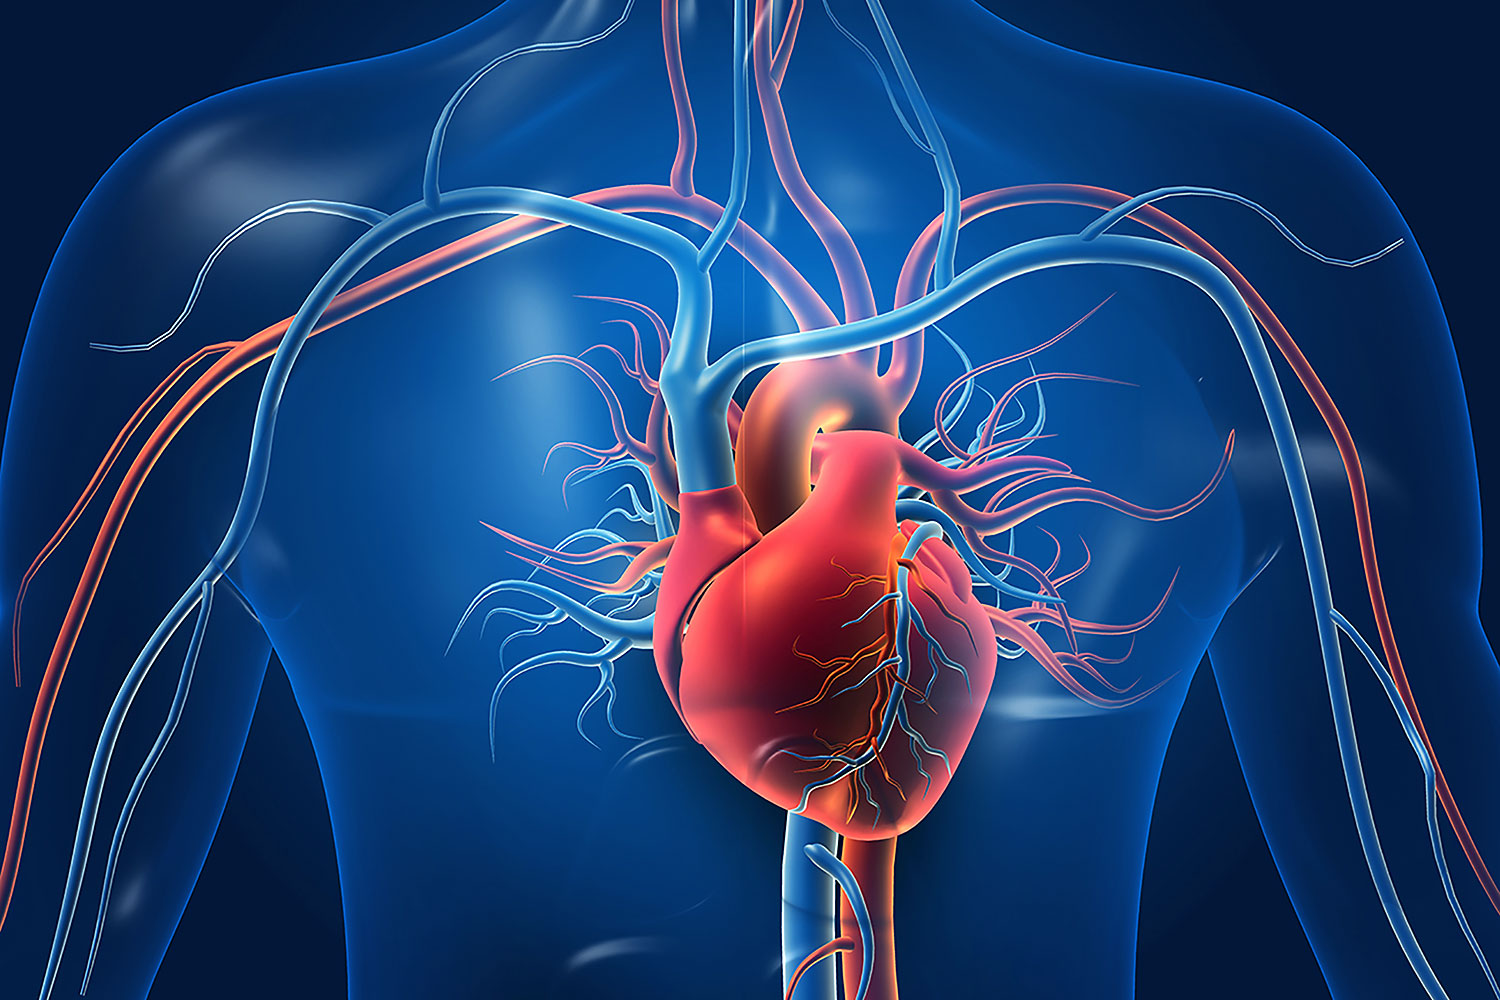

In [8]:
from IPython.display import Image
from sklearn.svm import SVC

Image('heart.jpg', width=800)

---------

### Data collection

Type of research:

- by purpose: **applied** - application in medicine for the early detection of cardiac arrhythmia

- by depth: **correlational** - we study how independent variable("diagnosis") is affected by several distinct dependent variables("age", "sex"..)

- by data type: **quantitative** - we have mathematical, measurable and comparable data

- by variable manipulation: **observational** - researchers observe patients

- by conclusion: **inductive** - we want to generalize things based on sample of pacients

- by time: **synchronous** - we assume that all data are collected at the same time

- by source of information: **secondary** - the researchers read informations about patients from medical documents

- according to the method of data collection: **mixed** - a combination of data known about patients through medical records and ECG data measured under controlled conditions

Data collection method - **documentary** - **limited access**: the main source of data are the patient's medical records.

Data were collected **according to the rules of research ethics** - the names and id numbers of the patients were removed from the database for the privacy purpose.


---------
### Data survey

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from pca import pca
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
#import scipy.stats as stats
import pylab
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [10]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')
df.dataframeName = 'data_arrhythmia.csv'
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [11]:
print(df.columns.values)

['age' 'sex' 'height' 'weight' 'qrs_duration' 'p-r_interval'
 'q-t_interval' 't_interval' 'p_interval' 'qrs' 'T' 'P' 'QRST' 'J'
 'heart_rate' 'q_wave' 'r_wave' 's_wave' "R'_wave" "S'_wave" 'AA' 'AB'
 'AC' 'AD' 'AE' 'AF' 'AG' 'AH' 'AI' 'AJ' 'AK' 'AL' 'AM' 'AN' 'AO' 'AP'
 'AR' 'AS' 'AT' 'AU' 'AV' 'AY' 'AZ' "AB'" 'BB' 'BC' 'BD' 'BE' 'BF' 'BG'
 'BH' 'BI' 'BJ' 'BK' 'BL' 'BM' 'BN' 'BO' 'BP' 'BR' 'BS' 'BT' 'BU' 'BV'
 'BY' 'BZ' 'CA' 'CB' 'CC' 'CD' 'CE' 'Cf' 'CG' 'CH' 'CI' 'CJ' 'CK' 'CL'
 'CM' 'CN' 'CO' 'CP' 'CR' 'CS' 'CT' 'CU' 'CV' 'CY' 'CZ' 'DA' 'DB' 'DC'
 'DD' 'DE' 'DF' 'DG' 'DH' 'DI' 'DJ' 'DK' 'DL' 'DM' 'DN' 'DO' 'DP' 'DR'
 'DS' 'DT' 'DU' 'DV' 'DY' 'DZ' 'EA' 'EB' 'EC' 'ED' 'EF' 'EG' 'EH' 'EI'
 'EJ' 'EK' 'EL' 'EM' 'EN' 'EO' 'EP' 'ER' 'ES' 'ET' 'EU' 'EV' 'EY' 'EZ'
 'FA' 'FB' 'FC' 'FD' 'FE' 'FF' 'FG' 'FH' 'FI' 'FJ' 'FK' 'FL' 'FM' 'FN'
 'FO' 'FP' 'FR' 'FS' 'FT' 'FU' 'FV' 'FY' 'FZ' 'GA' 'GB' 'GC' 'GD' 'GE'
 'GF' 'GG' 'GH' 'GI' 'GJ' 'GK' 'GL' 'GM' 'GN' 'GO' 'GP' 'GR' 'GS' 'GT'
 'GU' 'GV' 'GY' 'GZ

In [12]:
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In our data set, we have 452 patients and 279 features for each patient. Some variables are categorical(sex) and some continuous(age). <br> We do not have monotone data, but we have constants data.
Last column is interpreted as a number of heart arrhythmia claster. According to documentation, missing attribute values are distinguished with '?' so the first step is to replace them with "NaN". After that, we will remove the variables that are constant because they tell us nothing about pacients.

In [14]:
df[df == '?'].count().nlargest(10)

J               376
P                22
T                 8
QRST              1
heart_rate        1
age               0
sex               0
height            0
weight            0
qrs_duration      0
dtype: int64

<AxesSubplot:title={'center':'Frequency of NaN values'}>

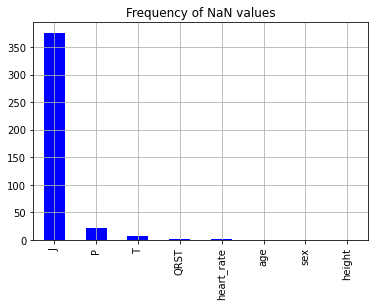

In [15]:
df = df.replace('?', np.NaN)
df.isna().sum().nlargest(8).plot(kind="bar", title="Frequency of NaN values", color='blue', grid='bool')

As we can see, in column 'J' we have a lof of missing values, more than 80%, so we will drop that column.

In [16]:
df.drop(['J'], axis=1, inplace=True)

We will replace the missing values using KNN. 

In [17]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isna().sum().nlargest(10)

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
dtype: int64

Finally, there are no more missing values in our data. <br>
As said before, next step is to drop constant variables.

<AxesSubplot:title={'center':'Number of unique values per column'}>

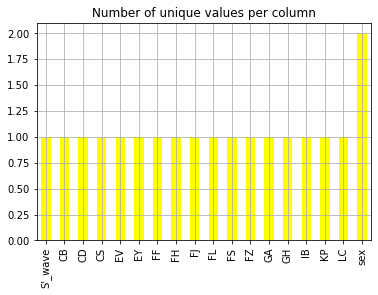

In [18]:
df.nunique().nsmallest(18).plot(kind="bar", title="Number of unique values per column", color='yellow', grid='bool')

In [19]:
df = df.loc[:, df.apply(pd.Series.nunique) != 1]

Last but not least, detecting parse data. 

In [20]:
df.astype(bool).sum(axis=0).nsmallest(80)

AB    1
AP    1
BC    1
BE    1
BM    1
     ..
AT    7
DF    7
AN    8
BF    8
CE    8
Length: 80, dtype: int64

Unfortunately, a big problem arises here. We have a lot of parse data. It is generally known that the algorithms we want to develop will behave badly with such data. We will focus to those that have up to 15 different values from zero and turn them into dummy variables.

In [21]:
categorical_cols = list(df.astype(bool).sum(axis=0).nsmallest(
    87).index)  #91 - this number can be arbitrary ofcourse, but we decide there is max. 13 dummy variables for one variable
df = pd.get_dummies(df, columns=categorical_cols)

In [22]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,GR_3.2,CA_0.0,CA_24.0,CA_28.0,CA_32.0,CA_36.0,CA_40.0,CA_44.0,CR_0.0,CR_1.0
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0,1,0,0,0,0,0,0,1,0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0,1,0,0,0,0,0,0,1,0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0,1,0,0,0,0,0,0,0,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0,1,0,0,0,0,0,0,1,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0,1,0,0,0,0,0,0,1,0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0,1,0,0,0,0,0,0,1,0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0,1,0,0,0,0,0,0,1,0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,0,1,0,0,0,0,0,0,1,0


Once we have prepared the data in the form we think is best to work with, next step is to reduce dimension by using PCA.

---------
### Principal Component Analysis

Before using PCA, the first step is to scale the features in our data. 

In [23]:
X = df.iloc[:, df.columns != 'diagnosis'].values
y = df.iloc[:, df.columns == 'diagnosis'].values

## Splitting data, resampling, scaling and PCA

\#\# tu možete očistiti što je duplo, ja nisam htio brisati

In [28]:
sample = False
sampler = RandomOverSampler()
#sampler = BorderlineSMOTE()
#sampler = SMOTE()

if isinstance(sampler, BorderlineSMOTE) or isinstance(sampler, SMOTE):
    # remove examples of classes with few examples
    # necessary if using SMOTE
    to_delete = pd.concat([y[y == 8], y[y == 7], y[y == 14], y[y == 15]])
    original_X = X
    original_y = y
    X = original_X.drop(to_delete.index)
    y = original_y.drop(labels=to_delete.index)

In [ ]:
unscaled_train_X, unscaled_test_X, train_y, test_y = train_test_split(X, y, train_size=0.80, stratify=y)

if sample:
    unscaled_train_X, train_y = sampler.fit_resample(unscaled_train_X, train_y)

scaler = StandardScaler().fit(unscaled_train_X)
train_X = scaler.transform(unscaled_train_X)
test_X = scaler.transform(unscaled_test_X)

pca = pca()
pca_data = pca.fit_transform(train_X)

pca.plot()

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [404] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [113] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[113]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


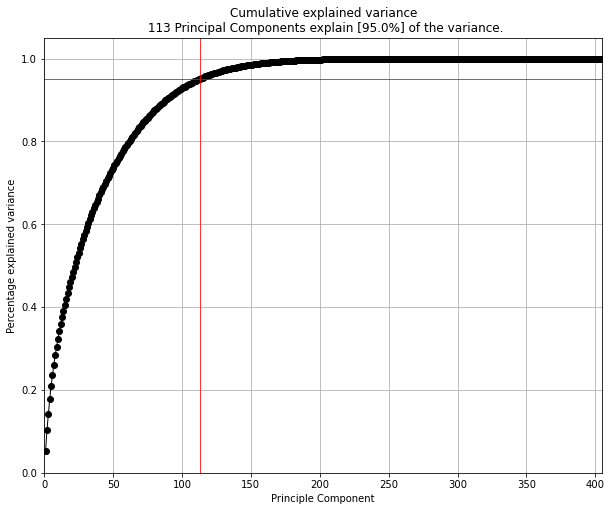

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 113 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [25]:
X = StandardScaler().fit_transform(X)

model = pca()
out = model.fit_transform(X)
model.plot()

As we can see, 113 Principal Components explain 95% of the variance and 150 Principal Components explain about 99% of the variance. 

In [26]:
pca.compute_topfeat()
model.compute_topfeat()

,PC,feature,loading,type
0,PC1,95,-0.182087,best
1,PC2,173,-0.175853,best
2,PC3,148,-0.154183,best
3,PC4,189,-0.181756,best
4,PC5,5,0.165756,best
...,...,...,...,...
564,PC373,391,0.644900,weak
565,PC401,393,0.298153,weak
566,PC135,397,0.218973,weak
567,PC15,403,-0.211315,weak


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'113 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (5.30% expl.var)', ylabel='PC2 (5.02% expl.var)'>)

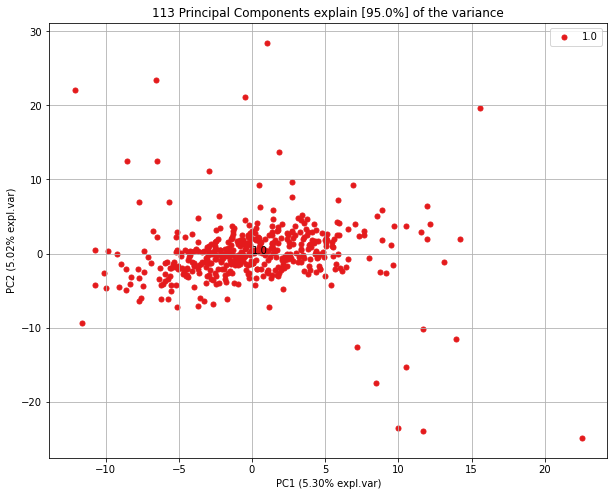

In [27]:
model.scatter()

Since we have many features, it is easy to notice that a small percentage of variability is explained only with the first two PCA components. <br>
Also, PCA has a convenient application for outliers detection. Let's illustrate that.

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'113 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (5.30% expl.var)', ylabel='PC2 (5.02% expl.var)'>)

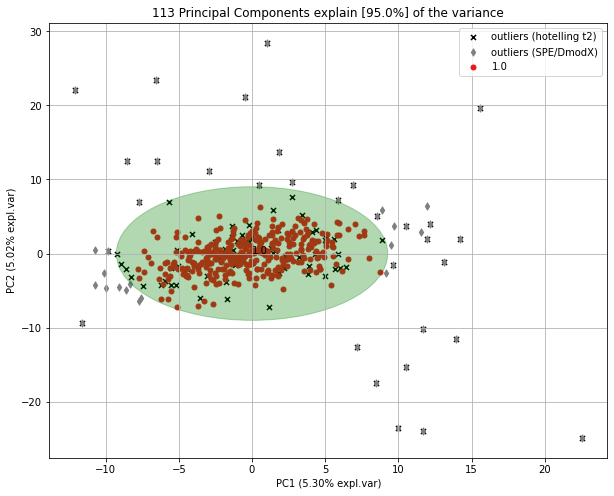

In [28]:
model.scatter(legend=True, SPE=True, hotellingt2=True)

For reduction of the dimension of our data set, we decide to take first 150 PCA components.

In [30]:
X

array([[ 1.73443926e+00, -1.10752020e+00,  6.41326695e-01, ...,
        -4.70881609e-02,  1.57934514e-01, -1.57934514e-01],
       [ 5.79312129e-01,  9.02918072e-01, -3.19978106e-02, ...,
        -4.70881609e-02,  1.57934514e-01, -1.57934514e-01],
       [ 4.57719799e-01, -1.10752020e+00,  1.56533051e-01, ...,
        -4.70881609e-02, -6.33173824e+00,  6.33173824e+00],
       ...,
       [-6.36611170e-01, -1.10752020e+00, -5.06483035e-03, ...,
        -4.70881609e-02,  1.57934514e-01, -1.57934514e-01],
       [-8.79795829e-01,  9.02918072e-01, -3.01327613e-01, ...,
        -4.70881609e-02,  1.57934514e-01, -1.57934514e-01],
       [ 1.91682776e+00,  9.02918072e-01, -1.66662712e-01, ...,
        -4.70881609e-02,  1.57934514e-01, -1.57934514e-01]])

In [6]:
pca = pca(n_components=150)
train_data = pca.fit_transform(train_X)
test_data = pca.transform(test_X)

NameError: name 'train_X' is not defined

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [404] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[150]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


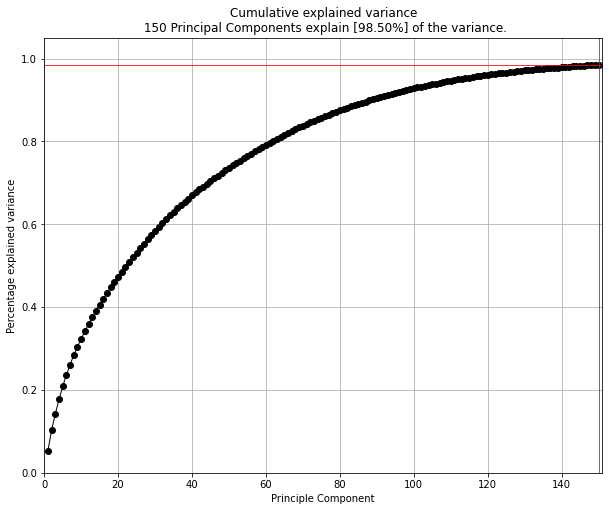

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 150 Principal Components explain [98.50%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [31]:
model = pca(n_components=150)
out = model.fit_transform(X)
model.plot()

In [32]:
X_after_pca = np.array(model.transform(X))

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.


---------
### Classification 

Finally, we will compare four different and well-known algorithms to perform the classification on our data.

In [33]:
X = X_after_pca
y = df.iloc[:, df.columns == 'diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

#### Support Vector Machine

SVMs is machine learning algorithm, often used for classification, regression and outliers detection. SVMs finds the best boundary that separates the data into categories by maximizing the orthogonal distance between the nearest points of each category and the boundary. Talking about linear SVM, in 1D this boundary will be dash, in 2D line, in 3D plane. But SVM offers much more. Especially when it comes to nonlinear classification, which is often the case. The first idea is to see the accuracy for each possible kernel.

linear accuracy:  64.84
poly accuracy:  63.74
rbf accuracy:  58.24
sigmoid accuracy:  64.84
rbf accuracy:  58.24


<AxesSubplot:title={'center':'Accuracy score for different kernels'}>

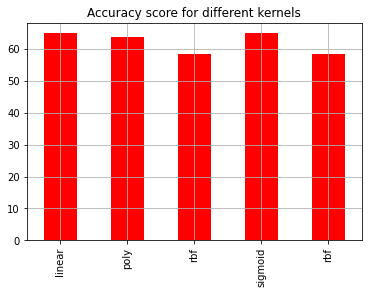

In [34]:
model = SVC()
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'rbf'], 'C': [0.1, 0.5, 1]}

clf = GridSearchCV(model, parameters, cv=5, return_train_score=True)
clf.fit(train_data, train_y)
cv_results = clf.cv_results_
print(clf.best_params_)
print(accuracy_score(test_y, clf.predict(test_data)))

pd.Series(cv_results['mean_test_score'], cv_results['params']).plot(kind="bar",
                                                                    title="Accuracy score for different kernels",
                                                                    color='red', grid=True)
plt.show()

In [ ]:

kernel = np.array(['linear', 'poly', 'rbf', 'sigmoid', 'rbf'])
accuracy_scores = []

for k in kernel:
    svm_ = svm.SVC(kernel=k, degree=1).fit(X_train, y_train)
    y_pred = svm_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(k, 'accuracy: ', "%.2f" % (accuracy * 100))
    accuracy_scores.append(accuracy_score(y_test, y_pred) * 100)

pd.Series(accuracy_scores, kernel).plot(kind="bar", title="Accuracy score for different hyperparameters", color='red',
                                        grid='bool')

From above results, the best candidate is the sigmoid kernel. But just in case, we will graphically show the accuracy of the polynomial kernel with degree in range $\langle 0,20 \rangle$.

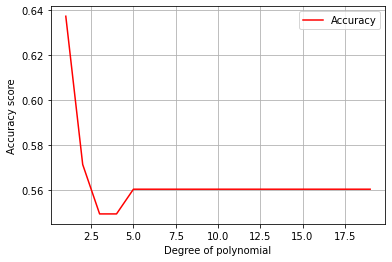

In [35]:


number_degree = [n for n in range(1, 20)]
accuracy_scores = []

for n in number_degree:
    svm_ = svm.SVC(kernel='poly', degree=n).fit(X_train, y_train)
    y_pred = svm_.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.plot(number_degree, accuracy_scores, label="Accuracy", color="red")
ax.set_ylabel("Accuracy score")
ax.set_xlabel("Degree of polynomial")
ax.grid(True)
ax.legend()

#### Logistic Regression Algorithm

Second algoritm we will use is Logistic Regression. <br>
Multinomial logistic regression is an extension of Logistic Regression that adds native support for multi-class classification problems.

In [5]:
model = LogisticRegression()
parameters = {'penalty': ('l1', 'l2', 'none'), 'C': [0.1, 1, 2],
              'solver': ('newton-cg', 'lbfgs', 'sag', 'saga')}

clf = GridSearchCV(model, parameters, cv=5)
clf.fit(train_data, train_y)
cv_results = clf.cv_results_
print(clf.best_params_)
print(accuracy_score(test_y, clf.predict(test_data)))

pd.Series(cv_results['mean_test_score'], cv_results['params']).plot(kind="bar",
                                                                    title="Accuracy score for different hyperparameters",
                                                                    color='yellow',
                                                                    grid='bool')

NameError: name 'train_data' is not defined

In [ ]:

solver = np.array(['newton-cg', 'lbfgs', 'sag', 'saga'])
accuracy_scores = []

for s in solver:
    lm_ = linear_model.LogisticRegression(multi_class='multinomial', solver=s).fit(X_train, y_train)
    y_pred = lm_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(s, 'accuracy: ', "%.2f" % (accuracy * 100))
    accuracy_scores.append(accuracy_score(y_test, y_pred) * 100)

pd.Series(accuracy_scores, solver).plot(kind="bar", title="Accuracy score for different solver", color='yellow',
                                        grid='bool')

As we see from the above, best option for optimization algorithm is SAGA.

#### K-Nearest Neighbors Algorithm

Moving on, we will use K-nearest neighbors algorithm. This is very simple algorithm, which assumes that similar things are in close proximity of each other. So if one sample it is "near" to another sample, whatever "near" meant, it assumes that they both belong to similar classes. The only question is how many nearest neighbors to take. This question is illustrated by the following code. 

In [ ]:
model = KNeighborsClassifier()
parameters = {'n_neighbors': range(1, 20), 'algorithm': ('ball_tree', 'kd_tree', 'brute')}

clf = GridSearchCV(model, parameters, cv=5)
clf.fit(train_data, train_y)
cv_results = clf.cv_results_
print(clf.best_params_)
print(accuracy_score(test_y, clf.predict(test_data)))

pd.Series(cv_results['mean_test_score'], cv_results['params']).plot(kind="bar",
                                                                    title="Accuracy score for different hyperparameters",
                                                                    color='yellow',
                                                                    grid='bool')

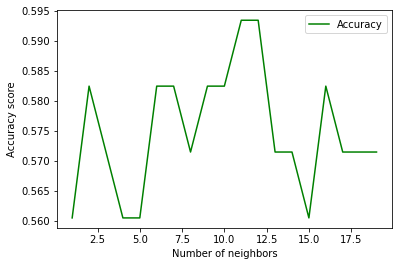

In [37]:
n_neighbors = [n for n in range(1, 20)]
accuracy_scores = []

for n in n_neighbors:
    knn_ = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_pred = knn_.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.plot(n_neighbors, accuracy_scores, label="Accuracy", color="green")

ax.set_ylabel("Accuracy score")
ax.set_xlabel("Number of neighbors")
ax.legend()

#### Random Forest Algorithm

And the last classification algorithm we will deal with is Random Forest.

In [ ]:

model = RandomForestClassifier()
parameters = {'n_estimators': [1, 100, 125, 150, 200], 'criterion': ('gini', 'entropy')}

clf = GridSearchCV(model, parameters, cv=5)
clf.fit(train_data, train_y)
cv_results = clf.cv_results_
print(clf.best_params_)
print(accuracy_score(test_y, clf.predict(test_data)))

pd.Series(cv_results['mean_test_score'], cv_results['params']).plot(kind="bar",
                                                                    title="Accuracy score for different hyperparameters",
                                                                    color='yellow',
                                                                    grid='bool')

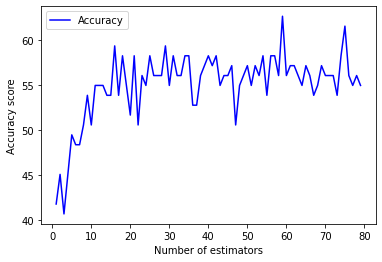

In [38]:
n_estimators = [n for n in range(1, 80)]
accuracy_scores = []

for n in n_estimators:
    ranf = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)
    y_pred = ranf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy * 100)

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.plot(n_estimators, accuracy_scores, label="Accuracy", color="blue")

ax.set_ylabel("Accuracy score")
ax.set_xlabel("Number of estimators")
ax.legend()

---------
### Conclusion

At the begging, through data survey, we noticed that our medical data were highly undesirable. There were a lot of missing data, parse data, incorrect data, outliers.. However, using certain transformations and methods, we tried to reshape the data to the form that will be useful for the algorithms. After that, by using Principal Component Analysis, we reduced the number of features to 150 preserving almost all variability of our data. Finally, we perform four different clustering algorithms and conclude that Support Vector Machine gives the highest accuracy. 

## Upgrade

Using official documentation, we want to determine the types of variables.

In [44]:
with open("arrhythmia.names") as f:
    print(f.read())

1. Title: Cardiac Arrhythmia Database

2. Sources:
   (a) Original owners od Database:
       -- 1. H. Altay Guvenir, PhD., 
             Bilkent University,
             Department of Computer Engineering and Information Science,
             06533 Ankara, Turkey
             Phone: +90 (312) 266 4133
             Email: guvenir@cs.bilkent.edu.tr

       -- 2. Burak Acar, M.S.,
             Bilkent University, 
             EE Eng. Dept. 
             06533 Ankara, Turkey
             Email: buraka@ee.bilkent.edu.tr

       -- 2. Haldun Muderrisoglu, M.D., Ph.D., 
             Baskent University, 
             School of Medicine
             Ankara, Turkey

   (b) Donor: H. Altay Guvenir
              Bilkent University,
              Department of Computer Engineering and Information Science,
              06533 Ankara, Turkey
              Phone: +90 (312) 266 4133
              Email: guvenir@cs.bilkent.edu.tr

   (c) Date: January, 1998

3. Past Usage:
   1. H. Altay Guvenir, Bura

The first thing we want to see is how much the patient is represented in each category. If this representation is unbalanced, we will apply oversampling.

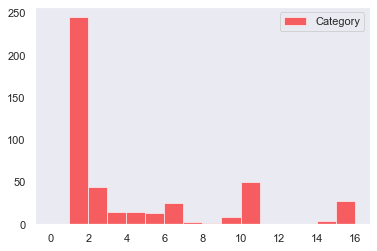

In [43]:
sns.set_theme()

plt.hist(df['diagnosis'], bins=16, range=(0, 16), label='Category', color='red', alpha=0.6)
plt.legend(loc='best')
plt.grid()
plt.show()

mozda ovdje ubacit dio sa samplingom ..?

### Testing correlation

First, we will focus on the categorical variables "sex" and "diagnosis". We use the **$\chi^2$ test** to test correlation. We set hypotheses : <br> **<br> $ H_0 = $ no relationship exists on the categorical variables in the population, they are independent. <br> $H_1 = $ relationship exists on the categorical variables in the population, they are dependent.** <br> <br> If they are independent, they are obviously uncorrelated.

In [46]:
freq = pd.crosstab(df["sex"], df["diagnosis"])
freq.transpose()

sex,0.0,1.0
diagnosis,,
1.0,85,160
2.0,18,26
3.0,15,0
4.0,11,4
5.0,4,9
6.0,14,11
7.0,3,0
8.0,2,0
9.0,4,5


<AxesSubplot:xlabel='diagnosis'>

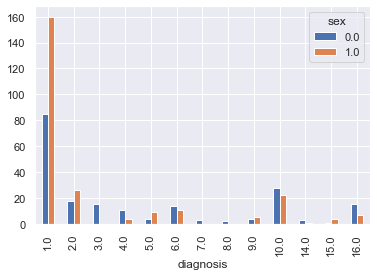

In [47]:
freq.transpose().plot.bar()

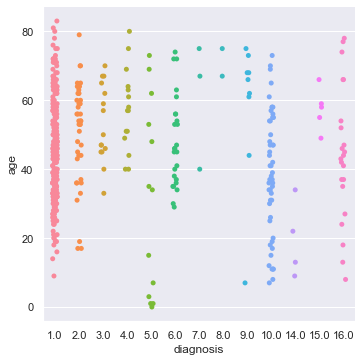

In [63]:
sns.catplot(x="diagnosis", y="age", data=df)

In [54]:
from scipy.stats import chi2_contingency
import math

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df["sex"], df["diagnosis"]))

d = {'P value chi square test': [p]}
pd.DataFrame(data=d, index=["Variables sex and diagnosis"])

,P value chi square test
Variables sex and diagnosis,5.342221e-07


As we can see from the above results, since the p value is less than $0.05$, at the significance level of $5\%$ we can reject $H_0$, i.e. **we say that the variables are correlated**. <br> <br>
To examine how strong this correlation is, we use the **Cramer coefficient V**.  <br> <br> $V = \sqrt{ \frac{\chi ^2}{n(q-1)}}$,  <br> <br>where, <br> <br> n is the size of sample, q is the minimum of numbers rows and columns and $\chi^2$ is test statistics.


In [56]:
n = df["sex"].size
q = min(pd.crosstab(df["sex"], df["diagnosis"]).shape)
V = math.sqrt(chi2 / (n * (q - 1)))

d = {'Cramér s V': [V]}
pd.DataFrame(data=d, index=["Variables sex and diagnosis"])

,Cramér s V
Variables sex and diagnosis,0.340369


Since the value is greater than $0.3$, we can conclude that there is a **medium correlation** of these variables.

The next thing is to examine the correlation of the continuous variables of a given set with a variable diagnosis that is categorical. For practical reasons, we decide to take: age, height, weight and heart rate.

In [57]:
df1 = df.groupby(df.diagnosis).agg({"age": list, "height": list, "weight": list, "heart_rate": list})
df1

,age,height,weight,heart_rate
diagnosis,,,,
1.0,"[55.0, 40.0, 49.0, 44.0, 45.0, 44.0, 47.0, 46....","[175.0, 160.0, 162.0, 168.0, 165.0, 160.0, 150...","[94.0, 52.0, 54.0, 56.0, 86.0, 88.0, 48.0, 58....","[71.0, 70.0, 67.0, 64.0, 72.0, 72.0, 76.0, 70...."
2.0,"[56.0, 51.0, 54.0, 37.0, 79.0, 19.0, 17.0, 60....","[164.0, 160.0, 160.0, 171.0, 150.0, 165.0, 170...","[65.0, 83.0, 63.0, 85.0, 60.0, 50.0, 61.0, 83....","[79.0, 71.0, 54.0, 70.0, 74.0, 67.0, 86.0, 80...."
3.0,"[62.0, 45.0, 33.0, 50.0, 67.0, 46.0, 59.0, 45....","[170.0, 177.0, 168.0, 170.0, 171.0, 170.0, 160...","[72.0, 72.0, 105.0, 80.0, 67.0, 80.0, 68.0, 74...","[70.0, 63.0, 70.0, 70.0, 81.0, 97.0, 60.0, 64...."
4.0,"[69.0, 75.0, 51.0, 40.0, 64.0, 51.0, 63.0, 40....","[176.0, 156.0, 165.0, 162.0, 155.0, 156.0, 175...","[75.0, 55.0, 76.0, 65.0, 88.0, 60.0, 80.0, 70....","[80.0, 89.0, 81.0, 76.0, 85.0, 73.0, 89.0, 89...."
5.0,"[69.0, 1.0, 35.0, 62.0, 1.0, 73.0, 48.0, 0.0, ...","[160.0, 110.0, 160.0, 165.0, 780.0, 160.0, 178...","[71.0, 10.0, 51.0, 70.0, 6.0, 80.0, 80.0, 10.0...","[98.0, 104.0, 92.0, 103.0, 138.0, 103.0, 102.0..."
6.0,"[56.0, 30.0, 53.0, 45.0, 41.0, 72.0, 46.0, 45....","[165.0, 170.0, 175.0, 175.0, 159.0, 160.0, 165...","[64.0, 73.0, 85.0, 80.0, 55.0, 70.0, 66.0, 71....","[53.0, 56.0, 51.0, 53.0, 53.0, 57.0, 56.0, 56...."
7.0,"[75.0, 40.0, 67.0]","[190.0, 176.0, 168.0]","[80.0, 74.0, 65.0]","[73.0, 86.0, 63.0]"
8.0,"[75.0, 67.0]","[190.0, 163.0]","[80.0, 78.0]","[63.0, 69.0]"
9.0,"[75.0, 68.0, 73.0, 66.0, 62.0, 68.0, 44.0, 61....","[159.0, 161.0, 158.0, 156.0, 176.0, 146.0, 170...","[59.0, 70.0, 72.0, 80.0, 73.0, 62.0, 84.0, 77....","[72.0, 63.0, 80.0, 64.0, 64.0, 61.0, 77.0, 56...."


The first idea is to implement a **one-factor ANOVA**, but an important assumption that we must check is the condition of equal variance in all samples, the so-called. condition of homoskedasticity. We use the **Barlett test** for this purpose.
<br> <br> $ H_0 =  \sigma_1 = \sigma_2 = \ldots = \sigma_{16}$. <br> $H_1 = \sigma_i \neq \sigma_j$ for at least one pair $(i,j)$. <br> <br>

In [60]:
from scipy.stats import bartlett

stat_1, p_1 = bartlett(df1["age"][1], df1["age"][2], df1["age"][3], df1["age"][4], df1["age"][5], df1["age"][6],
                       df1["age"][7], df1["age"][8], df1["age"][9], df1["age"][10], df1["age"][14], df1["age"][15],
                       df1["age"][16])
stat_2, p_2 = bartlett(df1["height"][1], df1["height"][2], df1["height"][3], df1["height"][4], df1["height"][5],
                       df1["height"][6], df1["height"][7], df1["height"][8], df1["height"][9], df1["height"][10],
                       df1["height"][14], df1["height"][15], df1["height"][16])
stat_3, p_3 = bartlett(df1["weight"][1], df1["weight"][2], df1["weight"][3], df1["weight"][4], df1["weight"][5],
                       df1["weight"][6], df1["weight"][7], df1["weight"][8], df1["weight"][9], df1["weight"][10],
                       df1["weight"][14], df1["weight"][15], df1["weight"][16])
stat_3, p_4 = bartlett(df1["heart_rate"][1], df1["heart_rate"][2], df1["heart_rate"][3], df1["heart_rate"][4],
                       df1["heart_rate"][5], df1["heart_rate"][6], df1["heart_rate"][7], df1["heart_rate"][8],
                       df1["heart_rate"][9], df1["heart_rate"][10], df1["heart_rate"][14], df1["heart_rate"][15],
                       df1["heart_rate"][16])

d = {'Age': [p_1], 'Height': [p_2], 'Weight': [p_3], 'Heart rate': [p_4]}
pd.DataFrame(data=d, index=["P value of Barlett s test"])

,Age,Height,Weight,Heart rate
P value of Barlett s test,0.002236,2.141223e-226,0.000037,1.212595e-12


As we can see from the above results, since the p value is less than $0.05$ for each variable, at the significance level of $5\%$ we can reject $H_0$, i.e. **we say that there is difference in variances between the groups**. <br>

So, since the preconditions for ANOVA are not satisfied, we will apply a somewhat statistically weaker but more robust **Kruskal–Wallis test**. <br> **<br> $ H_0 = $ no relationship exists on the categorical variables in the population, they are independent. <br> $H_1 = $ relationship exists on the categorical variables in the population, they are dependent.** <br> <br> If they are independent, they are obviously uncorrelated.

In [61]:
import scipy.stats as stats

stat_age, p_age = stats.kruskal(df1["age"][1], df1["age"][2], df1["age"][3], df1["age"][4], df1["age"][5],
                                df1["age"][6], df1["age"][7] + df1["age"][8], df1["age"][9], df1["age"][10],
                                df1["age"][14] + df1["age"][15], df1["age"][16])
stat_age, p_weight = stats.kruskal(df1["weight"][1], df1["weight"][2], df1["weight"][3], df1["weight"][4],
                                   df1["weight"][5], df1["weight"][6], df1["weight"][7] + df1["weight"][8],
                                   df1["weight"][9], df1["weight"][10], df1["weight"][14] + df1["weight"][15],
                                   df1["weight"][16])
stat_age, p_height = stats.kruskal(df1["height"][1], df1["height"][2], df1["height"][3], df1["height"][4],
                                   df1["height"][5], df1["height"][6], df1["height"][7] + df1["height"][8],
                                   df1["height"][9], df1["height"][10], df1["height"][14] + df1["height"][15],
                                   df1["height"][16])
stat_3, p_4 = stats.kruskal(df1["heart_rate"][1], df1["heart_rate"][2], df1["heart_rate"][3], df1["heart_rate"][4],
                            df1["heart_rate"][5], df1["heart_rate"][6], df1["heart_rate"][7], df1["heart_rate"][8],
                            df1["heart_rate"][9], df1["heart_rate"][10], df1["heart_rate"][14], df1["heart_rate"][15],
                            df1["heart_rate"][16])

d = {'Age': [p_1], 'Height': [p_2], 'Weight': [p_3], 'Heart rate': [p_4]}
pd.DataFrame(data=d, index=["P value of Barlett s test"])

,Age,Height,Weight,Heart rate
P value of Barlett s test,0.002236,2.141223e-226,0.000037,4.957411e-22


As we can see from the above results, since the p value is less than $0.05$, at the significance level of $5\%$ we can reject $H_0$, i.e. **we say that the diagnosis and those variable are correlated**.

### Normality testing 

One of the common assumptions in statistical tests and classifiers is the **normality of the data**.<br> We will check the normality by using:
* Q-Q plot 
* boxplot 
* histogram
* skewness and kurtosis
* Lilliefors test

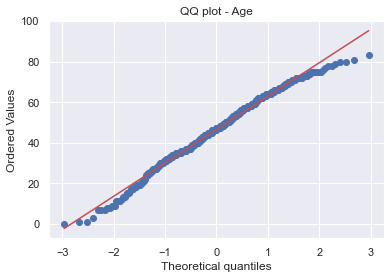

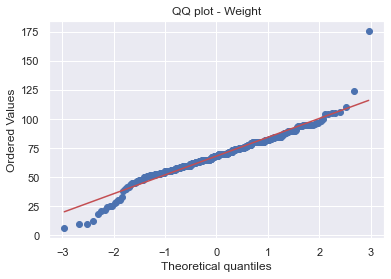

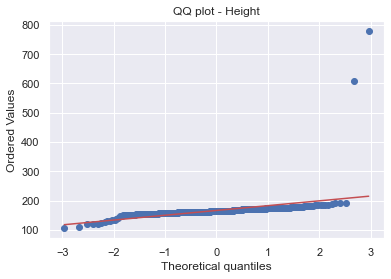

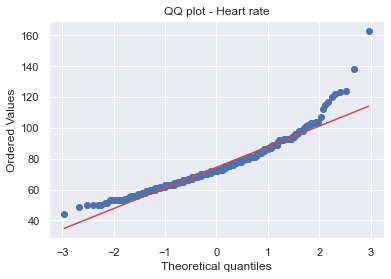

In [66]:
stats.probplot(df["age"].values, dist="norm", plot=pylab)
pylab.title("QQ plot - Age")
pylab.show()
stats.probplot(df["weight"].values, dist="norm", plot=pylab)
pylab.title("QQ plot - Weight")
pylab.show()
stats.probplot(df["height"].values, dist="norm", plot=pylab)
pylab.title("QQ plot - Height")
pylab.show()
stats.probplot(df["heart_rate"].values, dist="norm", plot=pylab)
pylab.title("QQ plot - Heart rate")
pylab.show()

**If the data is normally distributed, the points in the QQ-normal plot lie on a straight diagonal line.**

Text(0.5, 1.0, 'Box plot - Heart rate')

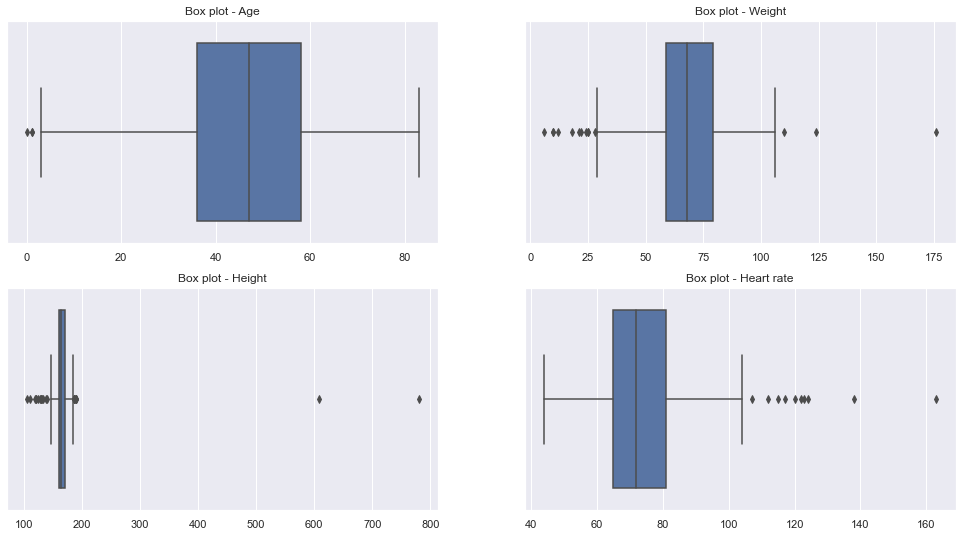

In [72]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 9))
sns.boxplot(df["age"].values, ax=axes[0, 0]).set_title('Box plot - Age')
sns.boxplot(df["weight"].values, ax=axes[0, 1]).set_title('Box plot - Weight')
sns.boxplot(df["height"].values, ax=axes[1, 0]).set_title('Box plot - Height')
sns.boxplot(df["heart_rate"].values, ax=axes[1, 1]).set_title('Box plot - Heart rate')

**If a box plot has equal proportions around the median, we can say distribution is symmetric or normal**

Text(0.5, 1.0, 'Histogram - Heart rate')

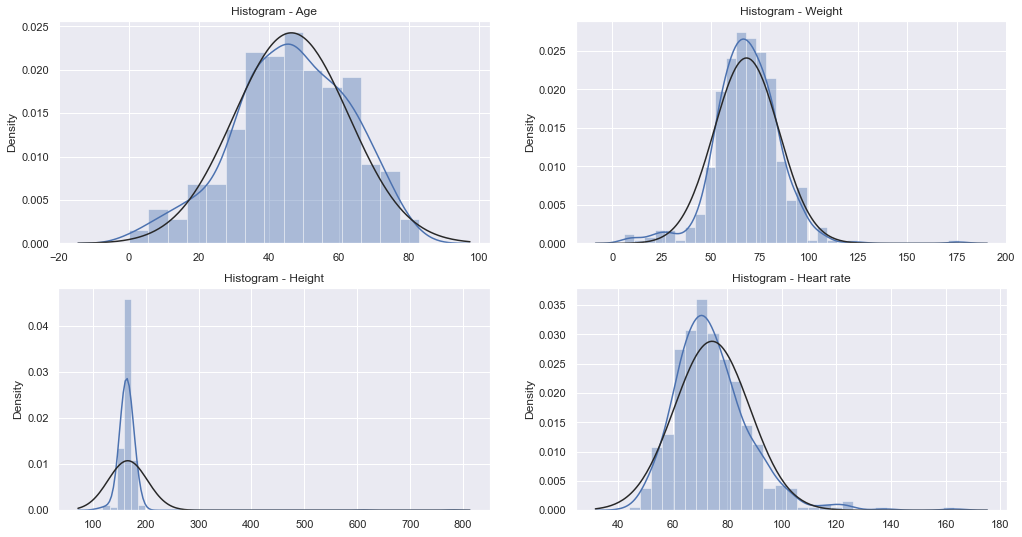

In [74]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(17, 9))

sns.distplot(df["age"].values, fit=norm, ax=axes[0, 0]).set_title('Histogram - Age')
sns.distplot(df["weight"].values, fit=norm, ax=axes[0, 1]).set_title('Histogram - Weight')
sns.distplot(df["height"].values, fit=norm, ax=axes[1, 0]).set_title('Histogram - Height')
sns.distplot(df["heart_rate"].values, fit=norm, ax=axes[1, 1]).set_title('Histogram - Heart rate')

**The fited distribution function is highlighted in black while the sample distribution function is highlighted in blue. If the graph is approximately bell-shaped and symmetric about the mean, we can assume normality.**

In [77]:
from scipy.stats import kurtosis
from scipy.stats import skew

d = {'Age': [skew(df["age"].values), kurtosis(df["age"].values)],
     'Weight': [skew(df["weight"].values), kurtosis(df["weight"].values)],
     'Height': [skew(df["height"].values), kurtosis(df["height"].values)],
     'Heart rate': [skew(df["heart_rate"].values), kurtosis(df["heart_rate"].values)]}
pd.DataFrame(data=d, index=['Skewness', 'Kurtosis'])

,Age,Weight,Height,Heart rate
Skewness,-0.285934,0.166577,13.678252,1.392539
Kurtosis,-0.214422,4.888605,206.670213,4.808380


**If skewness is not close to zero, then data set is not normally distributed.**

In [75]:
from statsmodels.stats.diagnostic import lilliefors

stat, p_1 = lilliefors(df["age"].values)
stat, p_2 = lilliefors(df["weight"].values)
stat, p_3 = lilliefors(df["height"].values)
stat, p_4 = lilliefors(df["heart_rate"].values)

d = {'Age': [p_1], 'Height': [p_2], 'Weight': [p_3], 'Heart rate': [p_4]}
pd.DataFrame(data=d, index=["P value of Lilliefors test"])

,Age,Height,Weight,Heart rate
P value of Lilliefors test,0.167384,0.001,0.001,0.001


As we can see from the above results, since the p value is greater than $0.05$, at the significance level of $5\%$ we can not reject $H_0$ for variable age, but for the variable height, weight and heart rate we can reject $H_0$ since the p value is less than $0.05$. <br> <br> **Patient age data were normally distributed while height, weight, and heart rate were not.**.

What still seems useful to us, is checking the **high correlation using correlation matrix** between any two variables in the data and  preferably drop one from each pair because all the relevant information about that variable are containted by the second one.
##Ana kaze da je ovo saržano u PCA?

In [78]:
corr_matrix = df.corr()
columns = list(df.columns)

for c in columns:
    if (corr_matrix[c].nlargest(2)[1] > 0.99):
        print("Positive correlation: ", c)
        print(corr_matrix[c].nlargest(2))
    if (corr_matrix[c].nsmallest(2)[0] < -0.9999):
        print("Negative correlation: ", c)
        print(corr_matrix[c].nsmallest(1))

Negative correlation:  AB_0.0
AB_1.0   -1.0
Name: AB_0.0, dtype: float64
Negative correlation:  AB_1.0
AB_0.0   -1.0
Name: AB_1.0, dtype: float64
Negative correlation:  AP_0.0
AP_1.0   -1.0
Name: AP_0.0, dtype: float64
Negative correlation:  AP_1.0
AP_0.0   -1.0
Name: AP_1.0, dtype: float64
Negative correlation:  BC_0.0
BC_1.0   -1.0
Name: BC_0.0, dtype: float64
Negative correlation:  BC_1.0
BC_0.0   -1.0
Name: BC_1.0, dtype: float64
Negative correlation:  BE_0.0
BE_1.0   -1.0
Name: BE_0.0, dtype: float64
Negative correlation:  BE_1.0
BE_0.0   -1.0
Name: BE_1.0, dtype: float64
Positive correlation:  BM_0.0
BM_0.0    1.0
HO_0.0    1.0
Name: BM_0.0, dtype: float64
Negative correlation:  BM_0.0
BM_32.0   -1.0
Name: BM_0.0, dtype: float64
Positive correlation:  BM_32.0
BM_32.0    1.0
HO_-0.4    1.0
Name: BM_32.0, dtype: float64
Negative correlation:  BM_32.0
BM_0.0   -1.0
Name: BM_32.0, dtype: float64
Negative correlation:  Cf_0.0
Cf_1.0   -1.0
Name: Cf_0.0, dtype: float64
Positive correla

In [79]:
#df.drop(['GS'], axis=1, inplace=True)
#df.drop(['HO'], axis=1, inplace=True)
#df.drop(['IL'], axis=1, inplace=True)
#df.drop(['LB'], axis=1, inplace=True)

KeyError: "['GS'] not found in axis"

Neka isprobavanja  random..

In [ ]:
import math

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=101), n_estimators=100,
                         learning_rate=0.01)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

df.groupby(["diagnosis"]).size()  #prije repliciranja

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16]:
    df2 = df2.append([df[df['diagnosis'] == i]] * math.floor((100 / df.groupby(["diagnosis"]).size()[i])),
                     ignore_index=True)

df2.groupby(["diagnosis"]).size()  #nakon repliciranja

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
y_pred = clf.fit(X_resampled, y_resampled).predict(X_test)
clf.score(X_test, y_test)